****BASIC EXPERIMENT****

***BOSTON HOUSING***

In [493]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from pylab import *


%matplotlib inline

In [494]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [495]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# boston.head()

In [496]:
boston['MEDV'] = boston_dataset.target
# boston.head()

In [497]:
X_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names).values
y_boston = boston['MEDV'] = boston_dataset.target

In [498]:
X_boston = scale(X_boston)
y_boston = scale(y_boston)

In [499]:
X_boston_train, X_boston_test, Y_boston_train, Y_boston_test = train_test_split(X, y, test_size = 0.15, random_state=5)

X_boston_train.shape, X_boston_test.shape, Y_boston_train.shape, Y_boston_test.shape

((340, 2), (60, 2), (340,), (60,))

In [500]:
lin_model_boston = LinearRegression()
lin_model_boston.fit(X_boston_train, Y_boston_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [501]:
predictions_boston = lin_model_boston.predict(X_boston_test)

In [502]:
metrics.mean_squared_error(Y_boston_test, predictions_boston)

0.7718031106544119

***SERVO***

In [503]:
def LoadData(url = "https://raw.githubusercontent.com/ttgadaev/SampleSizeEstimation/master/datasets/servo.csv",
             path = None):
    """
    return X, y
    """
    if path is not None:
        if os.path.exists(path):
            data = pd.read_csv(path, header=0)
        else:
            data = pd.read_csv(url, header=0)
            data.to_csv(path, header=True, index=False)
    else:
        data = pd.read_csv(url, header=0)

    y = data['answer'].values
    del data['answer']
    X = data.values
    return X, y

X_servo, y_servo = LoadData(url = "https://raw.githubusercontent.com/ttgadaev/SampleSizeEstimation/master/datasets/servo.csv")

X_servo[np.where(X_servo == 'A')] = 1
X_servo[np.where(X_servo == 'B')] = 2
X_servo[np.where(X_servo == 'C')] = 3
X_servo[np.where(X_servo == 'D')] = 4
X_servo[np.where(X_servo == 'E')] = 5
X_servo = np.array(X_servo, dtype = np.float64)

In [504]:
X_servo = scale(X_servo)
y_servo = scale(y_servo)

In [505]:
X_servo_train, X_servo_test, Y_servo_train, Y_servo_test = train_test_split(X_servo, y_servo, test_size = 0.15, random_state=5)

X_servo_train.shape, X_servo_test.shape, Y_servo_train.shape, Y_servo_test.shape

((141, 4), (26, 4), (141,), (26,))

In [506]:
lin_model_servo = LinearRegression()
lin_model_servo.fit(X_servo_train, Y_servo_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [507]:
predictions_servo = lin_model_servo.predict(X_servo_test)

In [508]:
metrics.mean_squared_error(Y_servo_test, predictions_servo)

0.42145048133276725

***TOGETHER WITH ZEROS***

In [509]:
X1 = np.hstack([X_boston, np.zeros([X_boston.shape[0], X_servo.shape[1]])])
X = np.hstack([np.zeros([X_servo.shape[0], X_boston.shape[1]]), X_servo])

X1.shape, X.shape

((506, 17), (167, 17))

In [510]:
X_together = np.vstack([X1, X])
X_together.shape

(673, 17)

In [511]:
y_together = np.hstack([y_boston, y_servo])
y_together.shape

(673,)

In [512]:
X_together_train, X_together_test, y_together_train, y_together_test = train_test_split(X_together, y_together, test_size = 0.157, random_state=5)
print(X_together_train.shape)
print(X_together_test.shape)
print(y_together_train.shape)
print(y_together_test.shape)

(567, 17)
(106, 17)
(567,)
(106,)


In [513]:
lin_mod_together = LinearRegression()
lin_mod_together.fit(X_together_train, y_together_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [514]:
predictions_together = lin_mod_together.predict(X_together_test)

In [515]:
metrics.mean_squared_error(y_together_test, predictions_together)

0.3170653452132749

***TOGETHER WTIH RANDOM***

In [516]:
np.random.seed(42)
X3 = np.hstack([X_boston, np.random.randn(X_boston.shape[0], X_servo.shape[1])])
X2 = np.hstack([np.random.randn(X_servo.shape[0], X_boston.shape[1]), X_servo])

X3.shape, X2.shape

((506, 17), (167, 17))

In [517]:
X_random = np.vstack([X3, X])
X_random.shape

(673, 17)

In [518]:
y_random = np.hstack([y_boston, y_servo])
y_random.shape

(673,)

In [519]:
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_random, y_random, test_size = 0.13, random_state=5)
print(X_random_train.shape)
print(X_random_test.shape)
print(y_random_train.shape)
print(y_random_test.shape)

(585, 17)
(88, 17)
(585,)
(88,)


In [520]:
lin_mod_random = LinearRegression()
lin_mod_random.fit(X_random_train, y_random_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [521]:
predictions_random = lin_mod_random.predict(X_random_test)

In [522]:
metrics.mean_squared_error(y_random_test, predictions_random)

0.467673238972883

В данном эксперименте изучается проблема, когда выборка имеет не одну порождающую модель, а несколько. В качестве данных используются выборки из dataset'ов boston housing и servo. Выборки из каждого датасета сливаются в одну общую. В общем датасете первые $13$ признаков соответствуют признакам объектов из датасета boston housing, а остальные $4$ --- servo. 

В первом эксперименте для объектов из одного датасета признаки, соответсвующие другому датасету, берутся нулевыми. На общей выборке обучается линейная модель. Так как признаки объектов, соответствующие другому датасету, взяты нулевыми, то это никак не мешает моделе обучаться на общих данных. Точность предсказания при таком построении модели высока.

Во втором эксперименте признаки объектов, не соответствующие датасету, берутся произвольным, то есть признаки становятся зашумленными, при этом все также используется одна общая модель. Такое построение выборки усложняет обучение общей модели, так как разделение объектов на принадлежность датасету становится труднее. Следствием этого является снижение точности предсказания. 

Таким образом, при построение модели для обучения нужно учитывать гипотезу порождения данных. Нередко оказывается, что данные порождены не одним источником, а несколькими. В этом случае лучше использовать мультимодель --- совокупность локальных моделей, где каждая локальная модель обрабатывает свою область признакового пространства (в одной области объекты имеют схожие признаки, объекты из разных областей имеют разные признаковые описания). 

****ILLUSTRATIONS****

In [523]:
x11 = []
x12 = []
x21 = []
x22 = []
y1 = []
y2 = []
y1p = []
y2p = []

a = lin_mod_together.coef_[0]
b = lin_mod_together.coef_[16]

for i in range(0, len(X_together_train[:, 5])):
    if (X_together_train[i,5] == 0):
        x11.append(X_together_train[i, 5])
        x12.append(X_together_train[i, 15])
        y1.append(y_together_train[i])
    else:
        x21.append(X_together_train[i, 5])
        x22.append(X_together_train[i, 15])
        y2.append(y_together_train[i])
print (lin_mod_together.coef_)

[-0.08887538  0.07845686 -0.0071169   0.0814531  -0.20825835  0.30074671
 -0.01636862 -0.30908542  0.24326171 -0.20839034 -0.22207079  0.0811737
 -0.36413419 -0.21963216 -0.24290827 -0.93031477  0.38823075]


In [524]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [526]:
def f_1(x):
    return 20*x[0] + np.random.randn()

def f_2(x):
    return 30*x[0] + np.random.randn()

In [643]:
n = 200 

x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)
y1 = np.array([f_1(x) for x in x1])
y2 = np.array([f_2(x) for x in x2])

#X1 = np.hstack([x1, np.random.randn(n,1)]) #две выборки, когда признаки заполняются случайно
#X2 = np.hstack([np.random.randn(n,1), x2])
X1 = np.hstack([x1, np.zeros([n,1])])#две выборки, когда признаки заполняются нулями
X2 = np.hstack([np.zeros([n,1]), x2])
                
X = np.vstack([X1, X2])
y = np.hstack([y1, y2])



In [644]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=5)

In [645]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
pred = lin_mod.predict(X_test)
metrics.mean_squared_error(y_test, pred)

w1 = lin_mod.coef_[0]
w2 = lin_mod.coef_[1]

In [646]:
lin_mod.coef_

array([20.02749858, 29.97984198])

In [647]:
xx.shape

(10, 10)

In [648]:
yy.shape

(10, 10)

In [649]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 40

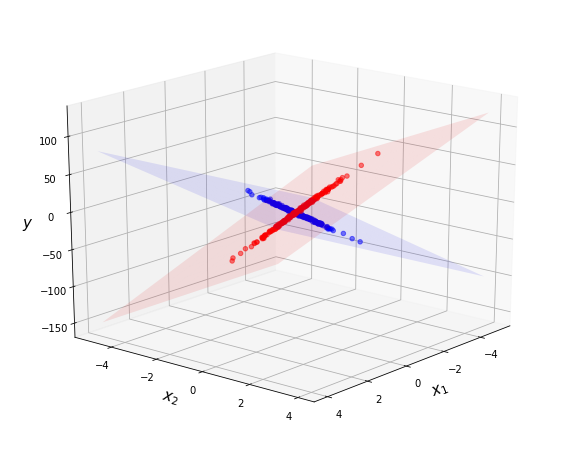

In [650]:
fig = plt.figure(figsize=(10, 8))

b = [0 for i in range(n)]

ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))

z1 = 0.0001 * np.array(xx) + w2* np.array(yy)
z2 = w1 * np.array(xx) + 0.0001*np.array(yy)
ax.scatter(X[0:200, 0],X[0:200, 1], y1, alpha=0.5, color='blue')
ax.scatter(X[200:400, 0],X[200:400, 1], y2, alpha=0.5, color='red')
#ax.scatter(y, x, z2, color='red')
#ax.scatter(y11, x, z2, color='red')
#ax.scatter(y22, x, z2, color='red')
ax.plot_surface(xx, yy, z1, alpha = 0.1, color = 'red')
ax.plot_surface(xx, yy, z2, alpha = 0.1, color = 'blue')
ax.view_init(20,40)
ax.set_xlabel('$x_1$', fontsize=15, fontweight="bold")
ax.set_ylabel('$x_2$', fontsize=15, fontweight="bold")
ax.set_zlabel('$y$', fontsize=15, fontweight="bold")
#ax.set_title('', fontsize=15, fontweight="bold")
savefig('experiment1-zeros.pdf')